In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib notebook

# Import

In [2]:
data_nodes = pd.read_csv("nodes.csv")
data_lines = pd.read_csv("lines.csv")
data_plants = pd.read_csv("plants.csv")
data_demand = pd.read_csv("demand_el.csv")
data_avail = pd.read_csv("availability.csv")

# Nodes

In [3]:
data_nodes

,index,zone,slack,lat,lon,name,voltage
0,n3303,DE,False,48.637446,12.172852,Altheim,220.0
1,n3304,DE,False,47.941187,11.979218,Marienberg,380.0
2,n3305,DE,False,48.792390,11.501312,Irsching,380.0
3,n3306,DE,False,48.348035,11.260986,Oberbachern,380.0
4,n3307,DE,False,48.087000,11.184000,Oberbrunn,220.0
...,...,...,...,...,...,...,...
610,n8052,DE,False,53.067627,8.438873,NaN,380.0
611,n8055,DE,False,51.955268,8.437500,NaN,220.0
612,n8060,DE,False,53.196984,8.595428,NaN,220.0
613,n8061,DE,False,49.561743,8.305664,NaN,380.0


In [4]:
#initial coordinates
#west= 6.7154
#east = 7.2729
#north = 51.1656
#south = 50.7545

#west= 6
#east = 8
#north = 52
#south = 48

#data_test_nodes = data_nodes[
#                (data_nodes.lat >= south) & 
#                (data_nodes.lat <= north) & 
#                (data_nodes.lon >= west) & 
#                (data_nodes.lon <= east) & 
#                (data_nodes.zone == "DE")]
data_model_nodes = data_nodes[data_nodes.zone == "DE"]
data_model_nodes = data_model_nodes.reset_index()
data_model_nodes = data_model_nodes.drop("level_0", axis=1)
data_model_nodes

,index,zone,slack,lat,lon,name,voltage
0,n3303,DE,False,48.637446,12.172852,Altheim,220.0
1,n3304,DE,False,47.941187,11.979218,Marienberg,380.0
2,n3305,DE,False,48.792390,11.501312,Irsching,380.0
3,n3306,DE,False,48.348035,11.260986,Oberbachern,380.0
4,n3307,DE,False,48.087000,11.184000,Oberbrunn,220.0
...,...,...,...,...,...,...,...
583,n8052,DE,False,53.067627,8.438873,NaN,380.0
584,n8055,DE,False,51.955268,8.437500,NaN,220.0
585,n8060,DE,False,53.196984,8.595428,NaN,220.0
586,n8061,DE,False,49.561743,8.305664,NaN,380.0


In [5]:
model_nodes = list(data_model_nodes.iloc[:,0])
model_nodes

['n3303',
 'n3304',
 'n3305',
 'n3306',
 'n3307',
 'n3308',
 'n3309',
 'n3310',
 'n3311',
 'n3312',
 'n3313',
 'n3314',
 'n3315',
 'n3316',
 'n3317',
 'n3318',
 'n3319',
 'n3320',
 'n3321',
 'n3322',
 'n3323',
 'n3324',
 'n3453',
 'n3454',
 'n3455',
 'n3456',
 'n3457',
 'n3458',
 'n3459',
 'n3460',
 'n3461',
 'n3462',
 'n3463',
 'n3464',
 'n3465',
 'n3466',
 'n3467',
 'n3468',
 'n3469',
 'n3470',
 'n3471',
 'n3472',
 'n3473',
 'n3474',
 'n3475',
 'n3476',
 'n3477',
 'n3478',
 'n3479',
 'n3480',
 'n3481',
 'n3482',
 'n3483',
 'n3484',
 'n3485',
 'n3486',
 'n3487',
 'n3488',
 'n3489',
 'n3490',
 'n3491',
 'n3492',
 'n3493',
 'n3494',
 'n3495',
 'n3496',
 'n3497',
 'n3498',
 'n3499',
 'n3500',
 'n3501',
 'n3502',
 'n3503',
 'n3504',
 'n3505',
 'n3507',
 'n3848',
 'n4496',
 'n4497',
 'n4498',
 'n4499',
 'n4500',
 'n4501',
 'n4502',
 'n4503',
 'n4504',
 'n4505',
 'n4506',
 'n4507',
 'n4508',
 'n4509',
 'n4510',
 'n4511',
 'n4512',
 'n4513',
 'n4514',
 'n4515',
 'n4516',
 'n4517',
 'n4518',


# Lines

In [6]:
data_lines

,index,node_i,node_j,b,maxflow,contingency,length,name_i,name_j,type,x per km,commissioned,part of # circuits,technology
0,l11522,n5543,n5557,0.038524,169.186723,True,68310.118087,Bentwisch,Baltic 1,132,0.380,1900,1.0,ac
1,l11516,n5543,n5557,0.040608,169.186723,True,64804.611519,Bentwisch,Baltic 1,132,0.380,1900,1.0,ac
2,l6920,n5557,n5579,0.101050,169.186723,True,26042.469944,Baltic 1,Baltic 2,132,0.380,1900,1.0,ac
3,l9289,n5557,n5579,0.100794,169.186723,True,26108.467838,Baltic 1,Baltic 2,132,0.380,1900,1.0,ac
4,l382,n5602,n5695,0.082589,169.186723,True,31863.647221,Ensted,Flensburg,132,0.380,1900,1.0,ac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,sl1,n7790,n7791,0.669604,491.556000,False,2.224597,NaN,NaN,220,0.301,1900,1.0,ac
1397,sl2,n6848,n6849,0.669604,491.556000,False,2.224597,NaN,NaN,220,0.301,1900,1.0,ac
1398,sl3,n7721,n7720,0.669604,491.556000,False,2.224597,NaN,NaN,220,0.301,1900,1.0,ac
1399,sl4,n5648,n7264,1.291672,491.556000,False,4.291269,Emden/Borßum,NaN,220,0.301,1900,1.0,ac


In [7]:
data_model_lines = data_lines
for index, row in data_model_lines.iterrows():
    if row.node_i not in model_nodes or row.node_j not in model_nodes:
        data_model_lines = data_model_lines.drop(index, axis=0)
data_model_lines = data_model_lines.reset_index()
data_model_lines = data_model_lines.drop("level_0", axis=1)
check_nan = False
for colname in ["index", "node_i", "node_j", "b", "maxflow"]:
    if data_model_lines[colname].isnull().sum() != 0:
        print(f"Following column contains NaNs: {colname}")
        check_nan = True
if check_nan:
    print("Found NaNs. Please check!")
data_model_lines

,index,node_i,node_j,b,maxflow,contingency,length,name_i,name_j,type,x per km,commissioned,part of # circuits,technology
0,l11522,n5543,n5557,0.038524,169.186723,True,68310.118087,Bentwisch,Baltic 1,132,0.380,1900,1.0,ac
1,l11516,n5543,n5557,0.040608,169.186723,True,64804.611519,Bentwisch,Baltic 1,132,0.380,1900,1.0,ac
2,l6920,n5557,n5579,0.101050,169.186723,True,26042.469944,Baltic 1,Baltic 2,132,0.380,1900,1.0,ac
3,l9289,n5557,n5579,0.100794,169.186723,True,26108.467838,Baltic 1,Baltic 2,132,0.380,1900,1.0,ac
4,l965,n5713,n5722,0.046529,507.560169,True,56558.167588,Hagermarsch,Alpha Ventus,132,0.380,1900,1.0,ac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,sl1,n7790,n7791,0.669604,491.556000,False,2.224597,NaN,NaN,220,0.301,1900,1.0,ac
1339,sl2,n6848,n6849,0.669604,491.556000,False,2.224597,NaN,NaN,220,0.301,1900,1.0,ac
1340,sl3,n7721,n7720,0.669604,491.556000,False,2.224597,NaN,NaN,220,0.301,1900,1.0,ac
1341,sl4,n5648,n7264,1.291672,491.556000,False,4.291269,Emden/Borßum,NaN,220,0.301,1900,1.0,ac


In [8]:
# check if all nodes are connected
connected_nodes = {node: {"start": 0,"end": 0} for node in model_nodes}
for index, row in data_model_lines.iterrows():
    connected_nodes[row.node_i]["start"] += 1
    connected_nodes[row.node_j]["end"] += 1
for key, value in connected_nodes.items():
    if (value["start"] == 0 and value["end"] == 0):
        print(key, value)

n5718 {'start': 0, 'end': 0}
n5724 {'start': 0, 'end': 0}
n5725 {'start': 0, 'end': 0}


In [9]:
connected_nodes

{'n3303': {'start': 4, 'end': 0},
 'n3304': {'start': 3, 'end': 0},
 'n3305': {'start': 5, 'end': 0},
 'n3306': {'start': 9, 'end': 0},
 'n3307': {'start': 3, 'end': 0},
 'n3308': {'start': 0, 'end': 3},
 'n3309': {'start': 0, 'end': 2},
 'n3310': {'start': 3, 'end': 0},
 'n3311': {'start': 3, 'end': 4},
 'n3312': {'start': 2, 'end': 2},
 'n3313': {'start': 2, 'end': 3},
 'n3314': {'start': 2, 'end': 0},
 'n3315': {'start': 6, 'end': 4},
 'n3316': {'start': 2, 'end': 4},
 'n3317': {'start': 3, 'end': 0},
 'n3318': {'start': 2, 'end': 0},
 'n3319': {'start': 2, 'end': 3},
 'n3320': {'start': 3, 'end': 0},
 'n3321': {'start': 1, 'end': 0},
 'n3322': {'start': 2, 'end': 3},
 'n3323': {'start': 1, 'end': 0},
 'n3324': {'start': 2, 'end': 2},
 'n3453': {'start': 2, 'end': 0},
 'n3454': {'start': 5, 'end': 0},
 'n3455': {'start': 6, 'end': 1},
 'n3456': {'start': 3, 'end': 0},
 'n3457': {'start': 2, 'end': 6},
 'n3458': {'start': 5, 'end': 2},
 'n3459': {'start': 2, 'end': 1},
 'n3460': {'st

In [10]:
# drop all nodes which are not used as a start and end point
for key, value in connected_nodes.items():
    if value["start"] == 0 and value["end"] == 0:
        data_model_nodes = data_model_nodes.drop(data_model_nodes[data_model_nodes['index'] == key ].index, axis = 0)
data_model_nodes = data_model_nodes.reset_index()
data_model_nodes = data_model_nodes.drop("level_0", axis=1)
data_model_nodes

,index,zone,slack,lat,lon,name,voltage
0,n3303,DE,False,48.637446,12.172852,Altheim,220.0
1,n3304,DE,False,47.941187,11.979218,Marienberg,380.0
2,n3305,DE,False,48.792390,11.501312,Irsching,380.0
3,n3306,DE,False,48.348035,11.260986,Oberbachern,380.0
4,n3307,DE,False,48.087000,11.184000,Oberbrunn,220.0
...,...,...,...,...,...,...,...
580,n8052,DE,False,53.067627,8.438873,NaN,380.0
581,n8055,DE,False,51.955268,8.437500,NaN,220.0
582,n8060,DE,False,53.196984,8.595428,NaN,220.0
583,n8061,DE,False,49.561743,8.305664,NaN,380.0


In [11]:
model_nodes = list(data_model_nodes.iloc[:,0])
model_nodes

['n3303',
 'n3304',
 'n3305',
 'n3306',
 'n3307',
 'n3308',
 'n3309',
 'n3310',
 'n3311',
 'n3312',
 'n3313',
 'n3314',
 'n3315',
 'n3316',
 'n3317',
 'n3318',
 'n3319',
 'n3320',
 'n3321',
 'n3322',
 'n3323',
 'n3324',
 'n3453',
 'n3454',
 'n3455',
 'n3456',
 'n3457',
 'n3458',
 'n3459',
 'n3460',
 'n3461',
 'n3462',
 'n3463',
 'n3464',
 'n3465',
 'n3466',
 'n3467',
 'n3468',
 'n3469',
 'n3470',
 'n3471',
 'n3472',
 'n3473',
 'n3474',
 'n3475',
 'n3476',
 'n3477',
 'n3478',
 'n3479',
 'n3480',
 'n3481',
 'n3482',
 'n3483',
 'n3484',
 'n3485',
 'n3486',
 'n3487',
 'n3488',
 'n3489',
 'n3490',
 'n3491',
 'n3492',
 'n3493',
 'n3494',
 'n3495',
 'n3496',
 'n3497',
 'n3498',
 'n3499',
 'n3500',
 'n3501',
 'n3502',
 'n3503',
 'n3504',
 'n3505',
 'n3507',
 'n3848',
 'n4496',
 'n4497',
 'n4498',
 'n4499',
 'n4500',
 'n4501',
 'n4502',
 'n4503',
 'n4504',
 'n4505',
 'n4506',
 'n4507',
 'n4508',
 'n4509',
 'n4510',
 'n4511',
 'n4512',
 'n4513',
 'n4514',
 'n4515',
 'n4516',
 'n4517',
 'n4518',


Dataframe lines does not need to be adapted since the missing nodes do not have an influence.

In [12]:
node_to_geo = {}
for index, row in data_model_nodes.iterrows():
    node_to_geo[row["index"]] = {"lon": row.lon, "lat": row.lat}
node_to_geo

{'n3303': {'lon': 12.172852, 'lat': 48.637446000000004},
 'n3304': {'lon': 11.979218, 'lat': 47.941187},
 'n3305': {'lon': 11.501311999999999, 'lat': 48.79239000000001},
 'n3306': {'lon': 11.260986, 'lat': 48.348034999999996},
 'n3307': {'lon': 11.184, 'lat': 48.086999999999996},
 'n3308': {'lon': 11.184, 'lat': 48.067},
 'n3309': {'lon': 11.355742999999999, 'lat': 48.277709},
 'n3310': {'lon': 11.363, 'lat': 48.861999999999995},
 'n3311': {'lon': 11.363, 'lat': 48.842},
 'n3312': {'lon': 11.778717, 'lat': 48.545705},
 'n3313': {'lon': 11.681213, 'lat': 48.322474},
 'n3314': {'lon': 11.589203, 'lat': 48.266740999999996},
 'n3315': {'lon': 11.825409, 'lat': 48.314254999999996},
 'n3316': {'lon': 11.841888, 'lat': 48.86832800000001},
 'n3317': {'lon': 12.034149000000001, 'lat': 48.992834},
 'n3318': {'lon': 12.628784, 'lat': 48.20088},
 'n3319': {'lon': 12.292328, 'lat': 48.659222},
 'n3320': {'lon': 12.929535000000001, 'lat': 48.332516999999996},
 'n3321': {'lon': 13.035, 'lat': 48.6860

In [13]:
colors =["r", "g", "y", "c", "m", "orange", "dimgrey", "fuchsia"]
color_count = 0
line_types = data_model_lines.type.unique()
line_type_to_color = {}
for line_type in line_types:
    line_type_to_color[line_type] = colors[color_count]
    color_count += 1
line_type_to_color

{'132': 'r',
 '220': 'g',
 '380': 'y',
 '220.0/380.0': 'c',
 '132.0/220.0': 'm',
 '132.0/380.0': 'orange'}

<IPython.core.display.Javascript object>


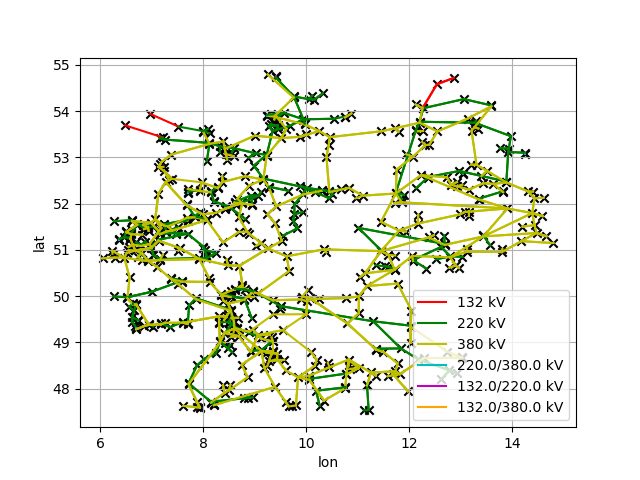

In [14]:
nodes_lon = data_model_nodes.lon
nodes_lat = data_model_nodes.lat
#plt.figure(figsize=(20,20))
plt.scatter(x=nodes_lon, y=nodes_lat, color="k", marker="x")
#for index, row in data_test_nodes.iterrows():
#    plt.annotate(row["index"], 
#                    xy=(node_to_geo[row["index"]]["lon"],
#                        node_to_geo[row["index"]]["lat"]),
#                    xycoords='data',
#                    xytext=(0,+2),
#                    textcoords='offset points')
legend_elements = [Line2D([0], [0],
                        color = line_type_to_color[line_type],
                        label = line_type + " kV") 
                   for line_type in line_types
                  ]
for index, row in data_model_lines.iterrows():
    plt.plot([node_to_geo[row.node_i]["lon"],node_to_geo[row.node_j]["lon"]],
             [node_to_geo[row.node_i]["lat"],node_to_geo[row.node_j]["lat"]],
             color = line_type_to_color[row.type]
            )
    plt.legend(handles=legend_elements)
plt.xlabel("lon")
plt.ylabel("lat")
plt.grid()
plt.show()

# Plants

In [15]:
data_plants

,index,node,mc_el,mc_heat,g_max,h_max,eta,tech,fuel,plant_type,lat,lon,heatarea,name,city,company,commissioned,status,storage_capacity
0,p0,n4763,17.883756,0.0,16.800,0.0,0.4026,steam,biomass,conventional,51.984761,9.822831,NaN,Werkskraftwerk Sappi Alfeld,Alfeld,Sappi Alfeld GmbH,1988.0,operating,NaN
1,p1,n8046,17.548136,0.0,9.800,0.0,0.4103,steam,biomass,conventional,47.797140,10.858740,NaN,HKW Altenstadt,Altenstadt,Heizkraftwerk Altenstadt GmbH & Co. KG,1999.0,operating,NaN
2,p2,n5556,17.399710,0.0,138.900,600.0,0.4138,steam,biomass,conventional,52.727130,12.011150,NaN,Zellstoff Stendal GmbH,Arneburg,Zellstoff Stendal GmbH,2004.0,operating,NaN
3,p3,n7261,17.370326,0.0,1.100,0.0,0.4145,steam,biomass,conventional,49.988218,9.155761,NaN,Blockheizkraftwerk 1,Aschaffenburg,DS Smith Paper Deutschland GmbH,2005.0,operating,NaN
4,p4,n7261,17.224880,0.0,0.800,0.0,0.4180,steam,biomass,conventional,49.988218,9.155761,NaN,Blockheizkraftwerk 2,Aschaffenburg,DS Smith Paper Deutschland GmbH,2010.0,operating,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,p3553,n8047,0.000000,0.0,40.450,0.0,1.0000,wind onshore,wind,wind onshore,50.771208,6.811523,NaN,NaN,NaN,NaN,NaN,operating,NaN
3554,p3554,n8051,0.000000,0.0,13.875,0.0,1.0000,wind onshore,wind,wind onshore,53.182173,8.419647,NaN,NaN,NaN,NaN,NaN,operating,NaN
3555,p3555,n8055,0.000000,0.0,4.000,0.0,1.0000,wind onshore,wind,wind onshore,51.955268,8.437500,NaN,NaN,NaN,NaN,NaN,operating,NaN
3556,p3556,n8060,0.000000,0.0,202.865,0.0,1.0000,wind onshore,wind,wind onshore,53.196984,8.595428,NaN,NaN,NaN,NaN,NaN,operating,NaN


In [16]:
data_model_plants = data_plants[data_plants.status == "operating"]
for index, row in data_model_plants.iterrows():
    if row.node not in model_nodes:
        data_model_plants = data_model_plants.drop(index, axis=0)
data_model_plants = data_model_plants.reset_index()
data_model_plants = data_model_plants.drop("level_0", axis=1)
check_nan = False
for colname in ["index", "node", "g_max", "tech", 
                "mc_el", "fuel", "plant_type"]:
    if data_model_plants[colname].isnull().sum() != 0:
        print(f"Following column contains NaNs: {colname}")
        check_nan = True
if check_nan:
    print("Found NaNs. Please check!")
data_model_plants

,index,node,mc_el,mc_heat,g_max,h_max,eta,tech,fuel,plant_type,lat,lon,heatarea,name,city,company,commissioned,status,storage_capacity
0,p0,n4763,17.883756,0.0,16.800,0.0,0.4026,steam,biomass,conventional,51.984761,9.822831,NaN,Werkskraftwerk Sappi Alfeld,Alfeld,Sappi Alfeld GmbH,1988.0,operating,NaN
1,p1,n8046,17.548136,0.0,9.800,0.0,0.4103,steam,biomass,conventional,47.797140,10.858740,NaN,HKW Altenstadt,Altenstadt,Heizkraftwerk Altenstadt GmbH & Co. KG,1999.0,operating,NaN
2,p2,n5556,17.399710,0.0,138.900,600.0,0.4138,steam,biomass,conventional,52.727130,12.011150,NaN,Zellstoff Stendal GmbH,Arneburg,Zellstoff Stendal GmbH,2004.0,operating,NaN
3,p3,n7261,17.370326,0.0,1.100,0.0,0.4145,steam,biomass,conventional,49.988218,9.155761,NaN,Blockheizkraftwerk 1,Aschaffenburg,DS Smith Paper Deutschland GmbH,2005.0,operating,NaN
4,p4,n7261,17.224880,0.0,0.800,0.0,0.4180,steam,biomass,conventional,49.988218,9.155761,NaN,Blockheizkraftwerk 2,Aschaffenburg,DS Smith Paper Deutschland GmbH,2010.0,operating,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,p3553,n8047,0.000000,0.0,40.450,0.0,1.0000,wind onshore,wind,wind onshore,50.771208,6.811523,NaN,NaN,NaN,NaN,NaN,operating,NaN
3452,p3554,n8051,0.000000,0.0,13.875,0.0,1.0000,wind onshore,wind,wind onshore,53.182173,8.419647,NaN,NaN,NaN,NaN,NaN,operating,NaN
3453,p3555,n8055,0.000000,0.0,4.000,0.0,1.0000,wind onshore,wind,wind onshore,51.955268,8.437500,NaN,NaN,NaN,NaN,NaN,operating,NaN
3454,p3556,n8060,0.000000,0.0,202.865,0.0,1.0000,wind onshore,wind,wind onshore,53.196984,8.595428,NaN,NaN,NaN,NaN,NaN,operating,NaN


In [17]:
# drop storages
data_model_plants = data_model_plants.drop(data_model_plants[data_model_plants.storage_capacity.notna()].index, axis=0)

In [18]:
data_model_plants.plant_type.value_counts()

conventional     1445
solar             680
wind onshore      494
hydro_ror         492
other_res           8
wind offshore       5
Name: plant_type, dtype: int64

In [19]:
data_model_plants.fuel.value_counts()

biomass      861
sun          688
wind         499
hydro        492
gas          243
waste        134
hard coal     92
lignite       58
oil           49
uran           8
Name: fuel, dtype: int64

In [20]:
model_plants = list(data_model_plants.iloc[:,0])
model_plants

['p0',
 'p1',
 'p2',
 'p3',
 'p4',
 'p5',
 'p6',
 'p7',
 'p8',
 'p9',
 'p10',
 'p11',
 'p12',
 'p13',
 'p14',
 'p15',
 'p16',
 'p17',
 'p18',
 'p19',
 'p20',
 'p21',
 'p22',
 'p23',
 'p24',
 'p25',
 'p26',
 'p27',
 'p28',
 'p29',
 'p30',
 'p31',
 'p32',
 'p33',
 'p34',
 'p35',
 'p36',
 'p37',
 'p38',
 'p39',
 'p40',
 'p41',
 'p42',
 'p43',
 'p44',
 'p45',
 'p46',
 'p47',
 'p48',
 'p49',
 'p50',
 'p51',
 'p52',
 'p53',
 'p54',
 'p56',
 'p57',
 'p58',
 'p59',
 'p60',
 'p61',
 'p62',
 'p63',
 'p64',
 'p65',
 'p66',
 'p67',
 'p68',
 'p69',
 'p70',
 'p71',
 'p72',
 'p73',
 'p74',
 'p75',
 'p77',
 'p78',
 'p79',
 'p80',
 'p81',
 'p82',
 'p83',
 'p84',
 'p85',
 'p86',
 'p87',
 'p88',
 'p89',
 'p90',
 'p91',
 'p92',
 'p93',
 'p94',
 'p95',
 'p96',
 'p97',
 'p98',
 'p99',
 'p100',
 'p101',
 'p102',
 'p103',
 'p104',
 'p105',
 'p106',
 'p107',
 'p108',
 'p109',
 'p110',
 'p111',
 'p112',
 'p113',
 'p114',
 'p115',
 'p117',
 'p118',
 'p119',
 'p120',
 'p121',
 'p122',
 'p123',
 'p124',
 'p125',
 

# Demand

In [21]:
# time dictionary
time_dic = {"winter": 361,
            "summer": 3769
            }
days = 10

time = "summer"

# time period
t_start = time_dic[time] - 1
t_end = t_start + days*24 + 1

In [22]:
data_demand

,index,n3303,n3304,n3305,n3306,n3307,n3308,n3309,n3310,n3311,...,n8045,n8046,n8047,n8051,n8052,n8055,n8060,n8061,n8066,utc_timestamp
0,t0001,86.293809,260.963446,115.420674,29.280449,99.333343,104.531864,29.280449,12.109278,519.623951,...,0,0,0,0,0,0,0,0,0,2017-01-01 00:00:00
1,t0002,82.642897,254.400938,109.789616,28.637953,97.664399,101.516465,28.637953,11.753331,480.875635,...,0,0,0,0,0,0,0,0,0,2017-01-01 01:00:00
2,t0003,81.577872,242.948202,108.515593,26.958856,91.456806,97.584900,26.958856,11.256112,498.223897,...,0,0,0,0,0,0,0,0,0,2017-01-01 02:00:00
3,t0004,80.632136,236.847265,107.491960,26.152133,88.455139,95.407514,26.152133,10.995458,502.933050,...,0,0,0,0,0,0,0,0,0,2017-01-01 03:00:00
4,t0005,78.668873,230.237182,104.831383,25.369758,85.775549,92.811287,25.369758,10.689218,492.782968,...,0,0,0,0,0,0,0,0,0,2017-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,t8732,87.117644,344.527922,114.115548,42.370216,149.098598,131.502838,42.370216,15.604316,285.239005,...,0,0,0,0,0,0,0,0,0,2017-12-30 19:00:00
8732,t8733,86.009132,326.440704,113.777561,39.793866,139.137528,125.471188,39.793866,14.869407,326.139912,...,0,0,0,0,0,0,0,0,0,2017-12-30 20:00:00
8733,t8734,86.780871,311.915797,115.086085,37.351310,129.815238,120.995019,37.351310,14.263916,379.265667,...,0,0,0,0,0,0,0,0,0,2017-12-30 21:00:00
8734,t8735,82.489691,287.180180,109.261187,33.958675,117.680314,112.010395,33.958675,13.150202,385.636645,...,0,0,0,0,0,0,0,0,0,2017-12-30 22:00:00


In [23]:
data_model_demand = data_demand[t_start:t_end]
check_nan = False
for colname in data_model_demand.columns:
    if data_model_demand[colname].isnull().sum() != 0:
        print(f"Following column contains NaNs: {colname}")
        check_nan = True
if check_nan:
    print("Found NaNs. Please check!")

In [24]:
for name, data in data_model_demand.iteritems():
    if name not in model_nodes and name != "index":
        data_model_demand = data_model_demand.drop(name, axis=1)
data_model_demand

,index,n3303,n3304,n3305,n3306,n3307,n3308,n3309,n3310,n3311,...,n8043,n8045,n8046,n8047,n8051,n8052,n8055,n8060,n8061,n8066
3768,t3769,82.315921,256.774083,108.430470,28.909422,99.094596,102.160584,28.909422,11.807079,464.244983,...,0,0,0,0,0,0,0,0,0,0
3769,t3770,85.165745,253.894162,112.669294,28.075112,95.474319,101.932946,28.075112,11.731922,515.844403,...,0,0,0,0,0,0,0,0,0,0
3770,t3771,89.531160,259.398763,118.853373,28.361282,95.895675,104.760373,28.361282,12.029415,565.526536,...,0,0,0,0,0,0,0,0,0,0
3771,t3772,96.911016,275.929141,129.079386,29.984117,100.954562,111.854139,29.984117,12.832806,628.106870,...,0,0,0,0,0,0,0,0,0,0
3772,t3773,114.957193,321.000612,153.754572,34.652212,116.073619,130.681552,34.652212,14.981660,766.300100,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,t4005,90.776171,308.184616,119.378793,35.933022,124.489543,120.700445,35.933022,14.090459,441.246313,...,0,0,0,0,0,0,0,0,0,0
4005,t4006,84.367387,288.645887,110.640447,33.702554,116.972038,112.878967,33.702554,13.176132,402.135310,...,0,0,0,0,0,0,0,0,0,0
4006,t4007,79.041909,269.189101,103.681009,31.377531,108.840540,105.357008,31.377531,12.292266,380.332040,...,0,0,0,0,0,0,0,0,0,0
4007,t4008,77.222240,253.159749,101.053703,29.005236,100.273522,99.757759,29.005236,11.573203,397.535666,...,0,0,0,0,0,0,0,0,0,0


# RES Availability

In [25]:
data_avail

,index,p2072,p2073,p2074,p2075,p2076,p2077,p2078,p2079,p2080,...,p3548,p3549,p3550,p3551,p3552,p3553,p3554,p3555,p3556,p3557
0,t0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.339069,0.339069,0.339069,0.339069,0.339069,0.339069,0.339069,0.339069,0.339069,0.339069
1,t0002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.331253,0.331253,0.331253,0.331253,0.331253,0.331253,0.331253,0.331253,0.331253,0.331253
2,t0003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.321440,0.321440,0.321440,0.321440,0.321440,0.321440,0.321440,0.321440,0.321440,0.321440
3,t0004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.325235,0.325235,0.325235,0.325235,0.325235,0.325235,0.325235,0.325235,0.325235,0.325235
4,t0005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.336398,0.336398,0.336398,0.336398,0.336398,0.336398,0.336398,0.336398,0.336398,0.336398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,t8732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.974076,0.974076,0.974076,0.974076,0.974076,0.974076,0.974076,0.974076,0.974076,0.974076
8732,t8733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.977843,0.977843,0.977843,0.977843,0.977843,0.977843,0.977843,0.977843,0.977843,0.977843
8733,t8734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.919556,0.919556,0.919556,0.919556,0.919556,0.919556,0.919556,0.919556,0.919556,0.919556
8734,t8735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.869422,0.869422,0.869422,0.869422,0.869422,0.869422,0.869422,0.869422,0.869422,0.869422


In [26]:
data_model_avail = data_avail[t_start:t_end]
check_nan = False
for colname in data_model_avail.columns:
    if data_model_avail[colname].isnull().sum() != 0:
        print(f"Following column contains NaNs: {colname}")
        check_nan = True
if check_nan:
    print("Found NaNs. Please check!")

In [27]:
for name, data in data_model_avail.iteritems():
    if name not in model_plants and name != "index":
        data_model_avail = data_model_avail.drop(name, axis=1)
data_model_avail

,index,p2072,p2073,p2074,p2075,p2076,p2077,p2078,p2079,p2080,...,p3548,p3549,p3550,p3551,p3552,p3553,p3554,p3555,p3556,p3557
3768,t3769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.563785,0.563785,0.563785,0.563785,0.563785,0.563785,0.563785,0.563785,0.563785,0.563785
3769,t3770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.577365,0.577365,0.577365,0.577365,0.577365,0.577365,0.577365,0.577365,0.577365,0.577365
3770,t3771,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,...,0.593252,0.593252,0.593252,0.593252,0.593252,0.593252,0.593252,0.593252,0.593252,0.593252
3771,t3772,0.008794,0.008794,0.008794,0.008794,0.008794,0.008794,0.008794,0.008794,0.008794,...,0.606523,0.606523,0.606523,0.606523,0.606523,0.606523,0.606523,0.606523,0.606523,0.606523
3772,t3773,0.066259,0.066259,0.066259,0.066259,0.066259,0.066259,0.066259,0.066259,0.066259,...,0.645719,0.645719,0.645719,0.645719,0.645719,0.645719,0.645719,0.645719,0.645719,0.645719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,t4005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.465205,0.465205,0.465205,0.465205,0.465205,0.465205,0.465205,0.465205,0.465205,0.465205
4005,t4006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.460818,0.460818,0.460818,0.460818,0.460818,0.460818,0.460818,0.460818,0.460818,0.460818
4006,t4007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.457360,0.457360,0.457360,0.457360,0.457360,0.457360,0.457360,0.457360,0.457360,0.457360
4007,t4008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.457557,0.457557,0.457557,0.457557,0.457557,0.457557,0.457557,0.457557,0.457557,0.457557


# Export

In [28]:
data_model_nodes.to_csv("test_data/" + time + "/nodes.csv")
data_model_plants.to_csv("test_data/" + time + "/plants.csv")
data_model_avail.to_csv("test_data/" + time + "/avail.csv")
data_model_demand.to_csv("test_data/" + time + "/demand.csv")
data_model_lines.to_csv("test_data/" + time + "/lines.csv")